In [1]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for working with dates and times
import datetime as dt

# Import TensorFlow and Keras libraries for building and training neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

# Import scikit-learn library for various metrics and preprocessing tools
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Import matplotlib library for creating plots and charts
import matplotlib.pyplot as plt

# Magic command to display plots inline in the Jupyter Notebook
%matplotlib inline

C:\Users\Dell\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Read in the VIC dataset from a CSV file
df=pd.read_csv("E:\HAGLdataset.csv")

In [3]:
df

,date,price,Open,High,Low,Vol.,Change %
0,9/7/2015,14600,14600,14700,14500,553.02K,-0.68%
1,9/8/2015,14800,14500,14800,14400,969.66K,1.37%
2,9/9/2015,14800,14900,15000,14700,809.43K,0.00%
3,9/10/2015,14800,14600,14800,14600,624.23K,0.00%
4,9/11/2015,14800,14700,14900,14700,654.53K,0.00%
...,...,...,...,...,...,...,...
1807,11/24/2022,7860,7300,7860,7150,10.88M,6.94%
1808,11/25/2022,8410,8400,8410,8300,20.45M,7.00%
1809,11/28/2022,8960,8940,8990,8660,18.24M,6.54%
1810,11/29/2022,8920,8710,9150,8510,23.40M,-0.45%


In [4]:
# Convert the 'date' column to a datetime data type
df['date']=pd.to_datetime(df.date,format='%m/%d/%Y')
#set the date as the index
df=df.set_index(pd.DatetimeIndex(df['date'].values))

In [5]:
# Create a new DataFrame containing only the 'date' and 'price' columns
df1 = pd.DataFrame(df, columns=['date', 'price'])

# Set the index of the DataFrame to the 'date' column
df1.index = df1.date

# Drop the 'date' column from the DataFrame
df1.drop('date', axis=1, inplace=True)

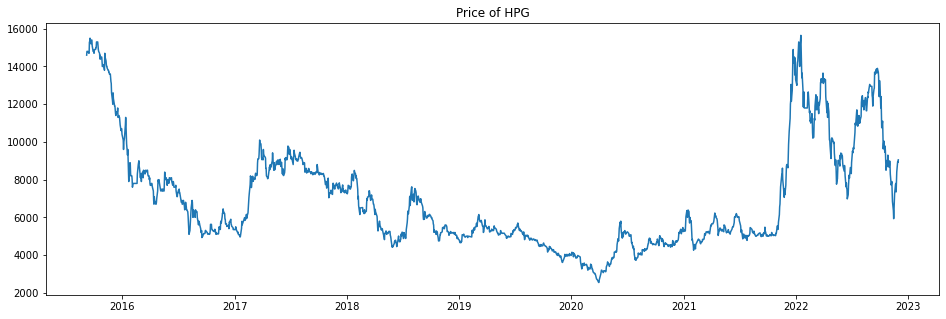

In [6]:
# Plot the 'price' column of the 'df' DataFrame
plt.figure(figsize=(16,5))
plt.plot(df['price'])
plt.title('Price of HPG')
plt.show()

In [7]:
# Convert the 'df1' DataFrame to a NumPy array
data = df1.values

# Scale the data using a MinMaxScaler

# Create a MinMaxScaler object with a specified range
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
sc_train = sc.fit_transform(data)

In [8]:
# Create training datasets for the model
x, y = [], []

# Loop through the train data, starting from the 30th value
for i in range(5, len(data)):
    # Append the last 5 values to the x_train array
    x.append(sc_train[i-5:i, 0])
    # Append the current value to the y_train array
    y.append(sc_train[i, 0])

In [9]:
# Convert the x and y arrays to NumPy arrays
x = np.array(x)
y = np.array(y)

# Reshape the x_train and y_train arrays to be one-dimensional
x = np.reshape(x, (x.shape[0], x.shape[1], 1))
y = np.reshape(y, (y.shape[0], 1))

In [10]:
# Build the model
model = Sequential()

# Add an LSTM layer with 128 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(units=64, input_shape=(x.shape[1], 1), return_sequences=True,kernel_regularizer=l2(0.01)))

# Add an LSTM layer with 64 units
model.add(LSTM(units=64, return_sequences=True))

# Add an LSTM layer with 64 units
model.add(LSTM(units=64, return_sequences=False))

# Add a dropout layer with a rate of 0.5
model.add(Dropout(0.5))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model.hdf5'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x, y, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80

Epoch 1: loss improved from inf to 0.15465, saving model to save_model_8-2.hdf5
37/37 - 7s - loss: 0.1546 - 7s/epoch - 194ms/step
Epoch 2/80

Epoch 2: loss improved from 0.15465 to 0.06027, saving model to save_model_8-2.hdf5
37/37 - 0s - loss: 0.0603 - 323ms/epoch - 9ms/step
Epoch 3/80

Epoch 3: loss improved from 0.06027 to 0.05196, saving model to save_model_8-2.hdf5
37/37 - 0s - loss: 0.0520 - 307ms/epoch - 8ms/step
Epoch 4/80

Epoch 4: loss improved from 0.05196 to 0.04626, saving model to save_model_8-2.hdf5
37/37 - 0s - loss: 0.0463 - 291ms/epoch - 8ms/step
Epoch 5/80

Epoch 5: loss did not improve from 0.04626
37/37 - 0s - loss: 0.0469 - 285ms/epoch - 8ms/step
Epoch 6/80

Epoch 6: loss improved from 0.04626 to 0.04413, saving model to save_model_8-2.hdf5
37/37 - 0s - loss: 0.0441 - 333ms/epoch - 9ms/step
Epoch 7/80

Epoch 7: loss did not improve from 0.04413
37/37 - 0s - loss: 0.0451 - 292ms/epoch - 8ms/step
Epoch 8/80

Epoch 8: loss improved from 0.04413 to 0.04389

In [11]:
# Print the scaled test data
print(sc_train)

[[0.91984733]
 [0.9351145 ]
 [0.9351145 ]
 ...
 [0.48931298]
 [0.48625954]
 [0.49618321]]


In [12]:
sc_train.shape

(1812, 1)

In [13]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[1807:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

(1, 5)


In [14]:
# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

[0.40534351145038167, 0.44732824427480916, 0.48931297709923666, 0.4862595419847328, 0.4961832061068702]


In [15]:
# demonstrate prediction for next 30 days

# Initialize variables
lst_output = []
n_steps = 5
i = 0

# Loop through the next 30 days
while(i < 31):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 5):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps,1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.4746513366699219], [0.4677512049674988], [0.45736783742904663], [0.4474192261695862], [0.4375624358654022], [0.42861342430114746], [0.4196575880050659], [0.4111323356628418], [0.4029173254966736], [0.39500272274017334], [0.38736414909362793], [0.3800062835216522], [0.3729064166545868], [0.366055965423584], [0.3594440817832947], [0.3530607223510742], [0.3468959927558899], [0.34094104170799255], [0.33518725633621216], [0.32962650060653687], [0.3242511749267578], [0.31905388832092285], [0.31402772665023804], [0.30916616320610046], [0.30446290969848633], [0.2999119460582733], [0.29550766944885254], [0.29124462604522705], [0.287117600440979], [0.2831217050552368], [0.27925220131874084]]


In [16]:
import datetime as dt

# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['date'].astype(str).tolist()

# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]

# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=31, freq='1d').tolist()

In [17]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[8767.93251038]
 [8677.54078507]
 [8541.51867032]
 [8411.19186282]
 [8282.06790984]
 [8164.83585835]
 [8047.51440287]
 [7935.83359718]
 [7828.21696401]
 [7724.5356679 ]
 [7624.47035313]
 [7528.08231413]
 [7435.07405818]
 [7345.33314705]
 [7258.71747136]
 [7175.0954628 ]
 [7094.3375051 ]
 [7016.32764637]
 [6940.953058  ]
 [6868.10715795]
 [6797.69039154]
 [6729.605937  ]
 [6663.76321912]
 [6600.076738  ]
 [6538.46411705]
 [6478.84649336]
 [6421.15046978]
 [6365.30460119]
 [6311.24056578]
 [6258.89433622]
 [6208.20383728]]


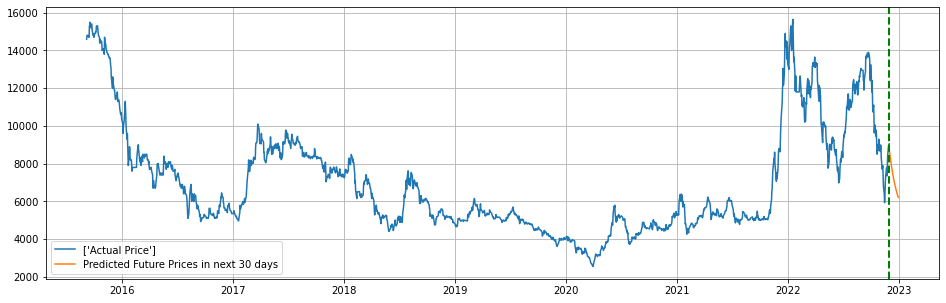

In [18]:
# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['price']).set_index(pd.Series(datelist_future))

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(df1['price'], label=['Actual Price'])
plt.plot(PREDICTIONS_FUTURE, label='Predicted Future Prices in next 30 days')

# Add a vertical line at the start of the future predictions
plt.axvline(x=min(PREDICTIONS_FUTURE.index), color='green', linewidth=2, linestyle='--')

# Add a legend and grid
plt.legend()
plt.grid()

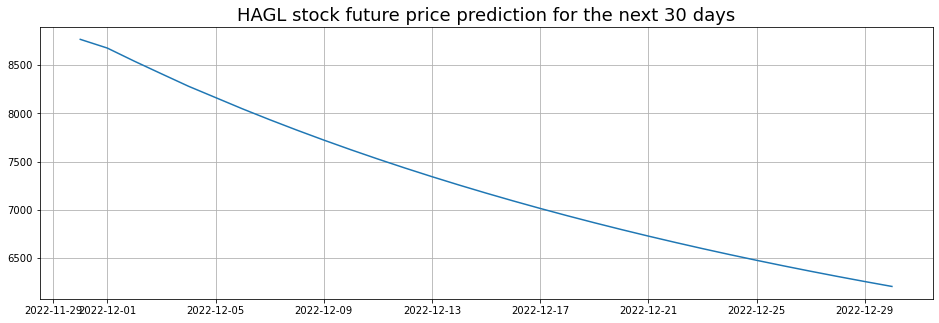

In [19]:
# Set the figure size and create a subplot
plt.figure(figsize=(16,5))
plt.plot(PREDICTIONS_FUTURE)
# Add a legend and grid
plt.title('HAGL stock future price prediction for the next 30 days',fontsize=18)
plt.grid()

In [20]:
print(PREDICTIONS_FUTURE)

                  price
2022-11-30  8767.932510
2022-12-01  8677.540785
2022-12-02  8541.518670
2022-12-03  8411.191863
2022-12-04  8282.067910
2022-12-05  8164.835858
2022-12-06  8047.514403
2022-12-07  7935.833597
2022-12-08  7828.216964
2022-12-09  7724.535668
2022-12-10  7624.470353
2022-12-11  7528.082314
2022-12-12  7435.074058
2022-12-13  7345.333147
2022-12-14  7258.717471
2022-12-15  7175.095463
2022-12-16  7094.337505
2022-12-17  7016.327646
2022-12-18  6940.953058
2022-12-19  6868.107158
2022-12-20  6797.690392
2022-12-21  6729.605937
2022-12-22  6663.763219
2022-12-23  6600.076738
2022-12-24  6538.464117
2022-12-25  6478.846493
2022-12-26  6421.150470
2022-12-27  6365.304601
2022-12-28  6311.240566
2022-12-29  6258.894336
2022-12-30  6208.203837
